In [19]:
# 9.30 Gradient and Newton methods
# (a) Gradient descent

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

m = 200
n = 100

np.random.seed(0)
A = np.random.randn(m, n)

x = np.zeros(n)

alpha = 0.01
beta = 0.5
grad_tol = 1e-3
max_iters = 1000

def f(x):
    return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-x**2))

# gradient descent
for k in range(max_iters):

    t = 1.0
    f_x = f(x)
    grad = A.T @ (1.0 / (1 - A @ x)) - 1/(1 + x) + 1/(1 - x)
    v = -grad # = delta_x

    # stopping criteria for gradient descent
    if np.linalg.norm(grad) <= grad_tol:
        break
        
    # feasible domain
    while (np.max(A@(x + t*v)) >= 1) or (np.max(np.abs(x + t*v)) >= 1):
        t *= beta
    
    # stopping criteria for backtracking line search 
    while f(x + t*v) > f_x + alpha*t*(grad @ v):
        t *= beta

    # updating x
    x = x + t*v

print(f(x))
print(grad)

-127.8282639373266
[-3.42928387e-04  1.29432059e-04  7.46605219e-05  1.25375558e-04
 -3.00942394e-05  6.57849232e-05 -6.18279303e-05  3.93176656e-04
 -7.21603105e-05 -2.15349612e-04  7.03621655e-05 -2.57116304e-04
  2.15710441e-04 -3.10511651e-04  1.14644551e-04  8.21468067e-05
 -3.24021992e-05  4.43735398e-04 -4.96822370e-05 -1.01513515e-05
 -1.76599803e-04 -3.08397502e-04  4.36893892e-05  2.78712403e-04
 -2.91749619e-04  2.31817157e-04  1.08322847e-04  1.30150938e-04
 -9.57889911e-05  1.07610473e-04  2.46225813e-04 -2.41874456e-04
  8.24533622e-06 -4.33300976e-05 -1.67696158e-04 -8.44591421e-05
 -1.46953436e-04 -2.14506369e-06  3.48317227e-05  1.10529821e-04
 -4.41440098e-04 -1.37402945e-04 -6.72439219e-05 -2.78221082e-04
  1.06030128e-04 -5.48029653e-05 -3.28735014e-05  4.58758817e-05
 -2.82497414e-05  1.48925893e-04  1.38154935e-05  2.39781482e-04
  4.86678657e-05 -1.46684224e-04 -6.05982557e-04 -3.28757792e-04
  3.62673470e-04 -2.93462183e-04 -1.59727392e-04  1.20242519e-04
 -2.37

In [22]:
# 9.30 
# (b) Newton method

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

m = 200
n = 100

x = np.zeros(n)

np.random.seed(0)
A = np.random.randn(m , n)

alpha = 0.01
beta = 0.5
tol = 1e-8
max_iters = 1000

def f(x):
    return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-x**2))
    
for i in range(max_iters):
    t = 1.0
    f_x = f(x)
    d = 1.0 / (1 - A @ x) 
    grad = A.T @ d - 1/(1 + x) + 1/(1 - x)
    H = A.T @ np.diag(d**2) @ A + np.diag(1/(1+x)**2 + 1/(1-x)**2)
    v = -np.linalg.solve(H, grad)   # delta_x

    # Newton decrement
    decrement_sqr = -grad @ v

    # stopping criteria for gradient descent
    if decrement_sqr / 2 <= tol:
        break
        
    # feasible domain
    while (np.max(A@(x + t*v)) >= 1) or (np.max(np.abs(x + t*v)) >= 1):
        t *= beta
    
    # stopping criteria for backtracking line search 
    while f(x + t*v) > f_x + alpha*t*(grad @ v):
        t *= beta

    # updating x
    x = x + t*v

print (f(x))
print (grad)

-127.8282639373266
[-7.09797672e-05  1.49909976e-04 -6.42339515e-06  1.90279396e-05
 -1.62311385e-04  4.49944733e-05 -5.33027238e-05 -2.45777573e-04
  8.46138752e-05  5.77712122e-05 -2.69249000e-05  2.53129079e-04
  2.11735330e-04  1.82829459e-04 -1.67228223e-04 -2.94687349e-04
  1.47331938e-04 -8.68519612e-05  1.06027973e-04  2.24289016e-04
  5.25886931e-06 -4.37676314e-05 -2.94126184e-04 -1.00700738e-04
  1.80634337e-04 -6.85976911e-05 -1.32711284e-04 -2.51202408e-04
  2.08662714e-04 -7.11545820e-05 -4.48182465e-05  3.45840479e-05
 -1.13999957e-06 -2.37158097e-05 -3.18387049e-05  1.06317767e-04
  9.15715399e-05  8.77303852e-05  9.32050368e-05 -3.67129343e-04
  1.29501998e-04  2.31733372e-05  1.34978745e-04  9.29612971e-05
  3.30840788e-04  1.50988574e-04  1.23217085e-05 -1.08135234e-04
 -1.82939586e-04 -2.86461964e-04 -4.93311461e-05 -1.67216412e-04
  1.17233194e-04  5.34694948e-05  2.09039935e-04 -2.36809984e-04
 -1.62564821e-04  4.03147790e-05 -2.93518779e-04 -9.11005120e-05
 -1.54

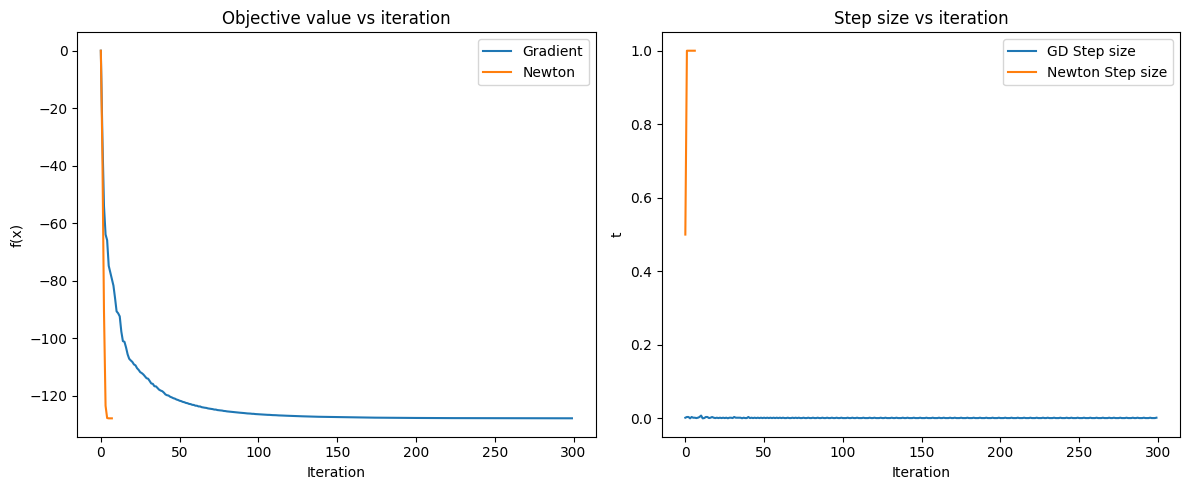

In [24]:
# 9.30 Conclusion
# ====== Analytic Center: Gradient vs Newton ======

import numpy as np
import matplotlib.pyplot as plt

# Problem size
m, n = 200, 100
np.random.seed(0)
A = np.random.randn(m, n)

def f(x):
    return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x**2))

# Parameters
alpha = 0.01
beta = 0.5
max_iters = 300
grad_tol = 1e-3
newton_tol = 1e-8

# ===================== Gradient Descent =====================

x = np.zeros(n)
gd_vals, gd_steps = [], []

for _ in range(max_iters):
    t = 1.0
    f_x = f(x)
    gd_vals.append(f_x)

    d = 1.0 / (1 - A @ x)
    grad = A.T @ d - 1/(1 + x) + 1/(1 - x)

    if np.linalg.norm(grad) <= grad_tol:
        break

    v = -grad

    while np.max(A @ (x + t*v)) >= 1 or np.max(np.abs(x + t*v)) >= 1:
        t *= beta
    while f(x + t*v) > f_x + alpha*t*(grad @ v):
        t *= beta

    x = x + t*v
    gd_steps.append(t)


# ===================== Newton Method =====================

x = np.zeros(n)
nt_vals, nt_steps = [], []

for _ in range(max_iters):
    t = 1.0
    f_x = f(x)
    nt_vals.append(f_x)

    d = 1.0 / (1 - A @ x)
    grad = A.T @ d - 1/(1 + x) + 1/(1 - x)

    H = A.T @ np.diag(d**2) @ A + np.diag(1/(1+x)**2 + 1/(1-x)**2)
    v = -np.linalg.solve(H, grad)

    decrement_sqr = max(0, -grad @ v)
    if decrement_sqr/2 <= newton_tol:
        break

    while np.max(A @ (x + t*v)) >= 1 or np.max(np.abs(x + t*v)) >= 1:
        t *= beta
    while f(x + t*v) > f_x + alpha*t*(grad @ v):
        t *= beta

    x = x + t*v
    nt_steps.append(t)


# ===================== Plots =====================

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(gd_vals, label="Gradient")
plt.plot(nt_vals, label="Newton")
plt.title("Objective value vs iteration")
plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(gd_steps, label="GD Step size")
plt.plot(nt_steps, label="Newton Step size")
plt.title("Step size vs iteration")
plt.xlabel("Iteration")
plt.ylabel("t")
plt.legend()

plt.tight_layout()
plt.show()


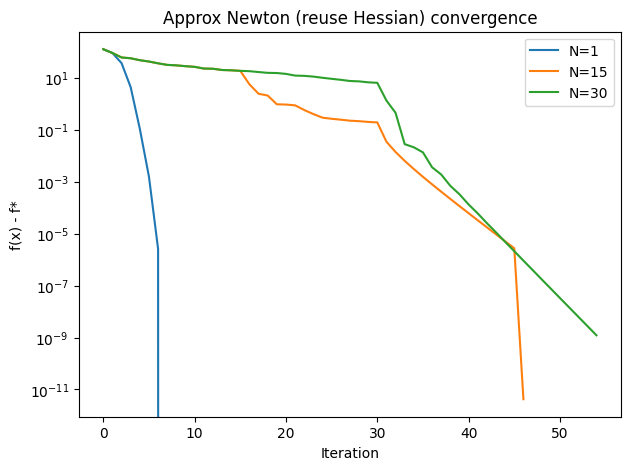

In [25]:
# 9.31  Some approximate Newton methods
# (a) - Reusing Hessian

import numpy as np
import matplotlib.pyplot as plt

m, n = 200, 100
np.random.seed(0)
A = np.random.randn(m, n)

alpha = 0.01
beta = 0.5
newton_tol = 1e-8
grad_tol = 1e-3
max_iters = 200

def f(x):
    return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x**2))

def grad_f(x):
    d = 1/(1 - A @ x)
    return A.T @ d - 1/(1 + x) + 1/(1 - x)

def hessian(x):
    d = 1/(1 - A @ x)
    return A.T @ np.diag(d**2) @ A + np.diag(1/(1+x)**2 + 1/(1-x)**2)

# Run approximate Newton: reuse Hessian every N steps

def approx_newton(N):
    x = np.zeros(n)
    vals = []
    steps = []
    
    L = None    # Cholesky cached
    
    for k in range(max_iters):
        f_x = f(x)
        vals.append(f_x)

        g = grad_f(x)

        # stopping
        if np.linalg.norm(g) < grad_tol:
            break

        # refresh Hessian only every N iterations
        if k % N == 0:
            H = hessian(x)
            L = np.linalg.cholesky(H)   # H = L L^T

        # solve H v = -g using cached L
        # v = -H^{-1} g = -(L L^T)^{-1} g
        v = -np.linalg.solve(L.T, np.linalg.solve(L, g))

        # line search feasibility
        t = 1.0
        while np.max(A @ (x + t*v)) >= 1 or np.max(np.abs(x + t*v)) >= 1:
            t *= beta
        
        # Armijo
        while f(x + t*v) > f_x + alpha*t*(g @ v):
            t *= beta

        x = x + t*v
        steps.append(t)

    return vals, steps


N_list = [1, 15, 30]
res = {}

for N in N_list:
    vals, steps = approx_newton(N)
    res[N] = (vals, steps)


opt_val = res[1][0][-1]


# Plot f(x) - f*

plt.figure(figsize=(7,5))
for N in N_list:
    vals, _ = res[N]
    err = np.array(vals) - opt_val
    plt.semilogy(err, label=f"N={N}")

plt.title("Approx Newton (reuse Hessian) convergence")
plt.xlabel("Iteration")
plt.ylabel("f(x) - f*")
plt.legend()
plt.show()


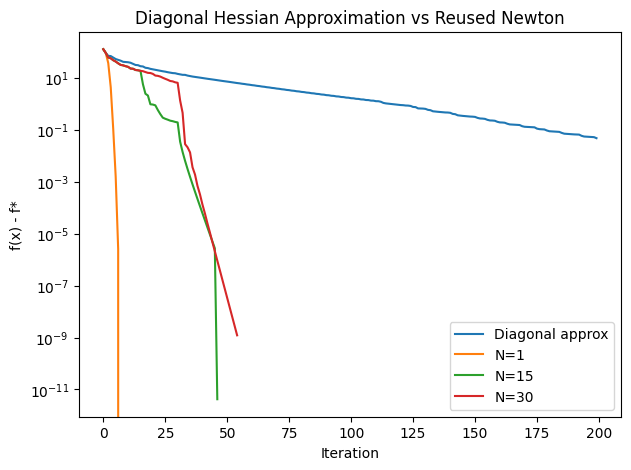

In [26]:
# 9.31 (b) - Diagonal Approximation

def approx_newton_diag():
    x = np.zeros(n)
    vals = []
    steps = []

    for k in range(max_iters):
        f_x = f(x)
        vals.append(f_x)

        g = grad_f(x)

        # stopping
        if np.linalg.norm(g) < grad_tol:
            break

        # full Hessian then extract diagonal
        Hfull = hessian(x)
        Hdiag = np.diag(np.diag(Hfull))

        # solve diagonal system: v = -H^{-1} g  -> elementwise divide
        v = -g / np.diag(Hdiag)

        # line search feasibility
        t = 1.0
        while np.max(A @ (x + t*v)) >= 1 or np.max(np.abs(x + t*v)) >= 1:
            t *= beta

        # Armijo
        while f(x + t*v) > f_x + alpha * t * (g @ v):
            t *= beta

        x = x + t*v
        steps.append(t)

    return vals, steps


# run diagonal version
vals_diag, steps_diag = approx_newton_diag()
err_diag = np.array(vals_diag) - opt_val


# Plot diagonal vs full Newton results
plt.figure(figsize=(7,5))
plt.semilogy(err_diag, label="Diagonal approx")
for N in N_list:
    vals, _ = res[N]
    err = np.array(vals) - opt_val
    plt.semilogy(err, label=f"N={N}")

plt.title("Diagonal Hessian Approximation vs Reused Newton")
plt.xlabel("Iteration")
plt.ylabel("f(x) - f*")
plt.legend()
plt.show()


status: optimal
a1: [558.47978091 420.63782568] b1: 65.8037737552147
a2: [-306.28378281  327.69296538] b2: -1132.0704391341308
a3: [-252.19599809 -748.33079106] b3: 1066.2666653789838


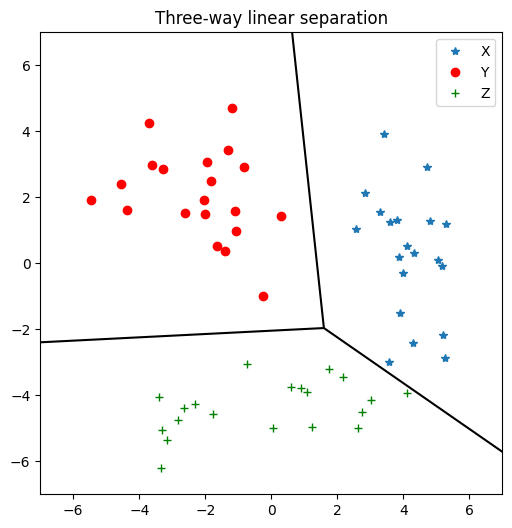

In [2]:
# additional exercise 1
# Three way linear classification

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Data
X = np.array([
[3.5674,4.1253,2.8535,5.1892,4.3273,3.8133,3.4117,3.8636,5.0668,3.9044,4.2944,4.7143,3.3082,5.2540,2.5590,3.6001,4.8156,5.2902,5.1908,3.9802],
[-2.9981,0.5178,2.1436,-0.0677,0.3144,1.3064,3.9297,0.2051,0.1067,-1.4982,-2.4051,2.9224,1.5444,-2.8687,1.0281,1.2420,1.2814,1.2035,-2.1644,-0.2821]
])

Y = np.array([
[-4.5665,-3.6904,-3.2881,-1.6491,-5.4731,-3.6170,-1.1876,-1.0539,-1.3915,-2.0312,-1.9999,-0.2480,-1.3149,-0.8305,-1.9355,-1.0898,-2.6040,-4.3602,-1.8105,0.3096],
[ 2.4117, 4.2642, 2.8460, 0.5250, 1.9053, 2.9831, 4.7079, 0.9702, 0.3854, 1.9228, 1.4914,-0.9984, 3.4330, 2.9246, 3.0833, 1.5910, 1.5266, 1.6256, 2.5037,1.4384]
])

Z = np.array([
[ 1.7451, 2.6345, 0.5937,-2.8217, 3.0304, 1.0917,-1.7793, 1.2422, 2.1873,-2.3008,-3.3258, 2.7617, 0.9166, 0.0601,-2.6520,-3.3205, 4.1229,-3.4085,-3.1594,-0.7311],
[-3.2010,-4.9921,-3.7621,-4.7420,-4.1315,-3.9120,-4.5596,-4.9499,-3.4310,-4.2656,-6.2023,-4.5186,-3.7659,-5.0039,-4.3744,-5.0559,-3.9443,-4.0412,-5.3493,-3.0465]
])

N = X.shape[1]
M = Y.shape[1]
P = Z.shape[1]

# ----- Variables -----
a1 = cp.Variable((2,1))
a2 = cp.Variable((2,1))
a3 = cp.Variable((2,1))
b1 = cp.Variable()
b2 = cp.Variable()
b3 = cp.Variable()

# functions and constraints
lhs_X = a1.T @ X - b1            # shape (1, N)
rhs_X = cp.maximum(a2.T @ X - b2, a3.T @ X - b3) + 1

lhs_Y = a2.T @ Y - b2
rhs_Y = cp.maximum(a1.T @ Y - b1, a3.T @ Y - b3) + 1

lhs_Z = a3.T @ Z - b3
rhs_Z = cp.maximum(a1.T @ Z - b1, a2.T @ Z - b2) + 1

constraints = [
    lhs_X >= rhs_X,
    lhs_Y >= rhs_Y,
    lhs_Z >= rhs_Z,
    a1 + a2 + a3 == 0,
    b1 + b2 + b3 == 0,
]

prob = cp.Problem(cp.Minimize(0), constraints)
prob.solve(solver=cp.SCS, verbose=False)

print("status:", prob.status)
print("a1:", a1.value.ravel(), "b1:", b1.value)
print("a2:", a2.value.ravel(), "b2:", b2.value)
print("a3:", a3.value.ravel(), "b3:", b3.value)

# plot
a1v = a1.value.flatten()
a2v = a2.value.flatten()
a3v = a3.value.flatten()
b1v = float(b1.value)
b2v = float(b2.value)
b3v = float(b3.value)

u1 = a1v - a2v
u2 = a2v - a3v
u3 = a3v - a1v
v1 = b1v - b2v
v2 = b2v - b3v
v3 = b3v - b1v

t = np.arange(-7, 7.001, 0.01)
def safe_line(u, v):
    # y = (-t*u_x + v)/u_y, u = [u_x, u_y]
    eps = 1e-9 * np.sign(u[1]) if abs(u[1]) < 1e-9 else 0.0
    return (-t * u[0] + v) / (u[1] + eps)

line1 = safe_line(u1, v1)
line2 = safe_line(u2, v2)
line3 = safe_line(u3, v3)

def mask_idx(u_next, v_next, t, y):
    pts = np.vstack([t, y])  # shape (2, len)
    return (u_next @ pts - v_next) > 0

idx1 = mask_idx(u2, v2, t, line1)
idx2 = mask_idx(u3, v3, t, line2)
idx3 = mask_idx(u1, v1, t, line3)

plt.figure(figsize=(6,6))
plt.plot(X[0,:], X[1,:], '*', label='X')
plt.plot(Y[0,:], Y[1,:], 'ro', label='Y')
plt.plot(Z[0,:], Z[1,:], 'g+', label='Z')
plt.plot(t[idx1], line1[idx1], 'k')
plt.plot(t[idx2], line2[idx2], 'k')
plt.plot(t[idx3], line3[idx3], 'k')
plt.axis([-7, 7, -7, 7])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Three-way linear separation')
plt.show()


In [5]:
# additional exercises 2
# Efficient numerical method for a regularized least-squares problem

# with Woodbury !!

import numpy as np
from scipy.sparse import diags,eye
from scipy.sparse.linalg import splu
import time

n = 2000
k = 100
d = 1.0
e = 1.0

A = np.random.randn(k,n)
b = np.random.randn(k)
E = np.ones(n)
D = diags([-E, 2*E, -E], [-1,0,1], (n,n)).tolil() # 저장 방식이 행 리스트 기반으로 바뀜 / 원소 수정 빨라지는 대신, 연산 느려짐 <-> .tocsc()
D[0, 0] = 1
D[-1, -1] = 1

# 저장 방식이 열 방향으로 바뀜 / 연산 빨라지는 대신, 원소 수정 느려짐 
# “이제 수정 끝났으니 최적화된 형태로 계산 시작하자!” 선언과도 같다.
D = D.tocsc()

P = e * eye(n) + d * D
g = A.T @ b
F = A.T @ A + P  # Fx = g

# Consumed time: Dense method  
t = time.time()
x1 = np.linalg.solve(np.array(F), g)
t1 = time.time() - t

# Consumed time: Woodbury sparse method 
LU = splu(P) # factorize P to sparse LU
Z = LU.solve(np.hstack([g[:,None],A.T])) 
z = Z[:,0];
Z2 = Z[:,1:]
u = A @ z;S=np.eye(k)+A@Z2
z3 = np.linalg.solve(S, u)
x2 = z - Z2 @ z3
t2 = time.time()- t - t1

print(t1,t2,np.linalg.norm(x2-x1)/np.linalg.norm(x1))


0.7168200016021729 0.02768707275390625 6.369175945836248e-13
